In [13]:
import matplotlib.pyplot as plt
import numpy as np

Length of x[n]: Nx = 28
Length of h[n]: Nh = 9
Length of y[n]: Ny = 36

Theoretical length: Ny = Nx + Nh - 1 = 28 + 9 - 1 = 36
Does it agree with theory? True

Explanation:
When convolving two finite sequences of lengths Nx and Nh,
the output sequence has length Ny = Nx + Nh - 1.
This is because the convolution sum extends over all values
where the two sequences overlap as one slides past the other.


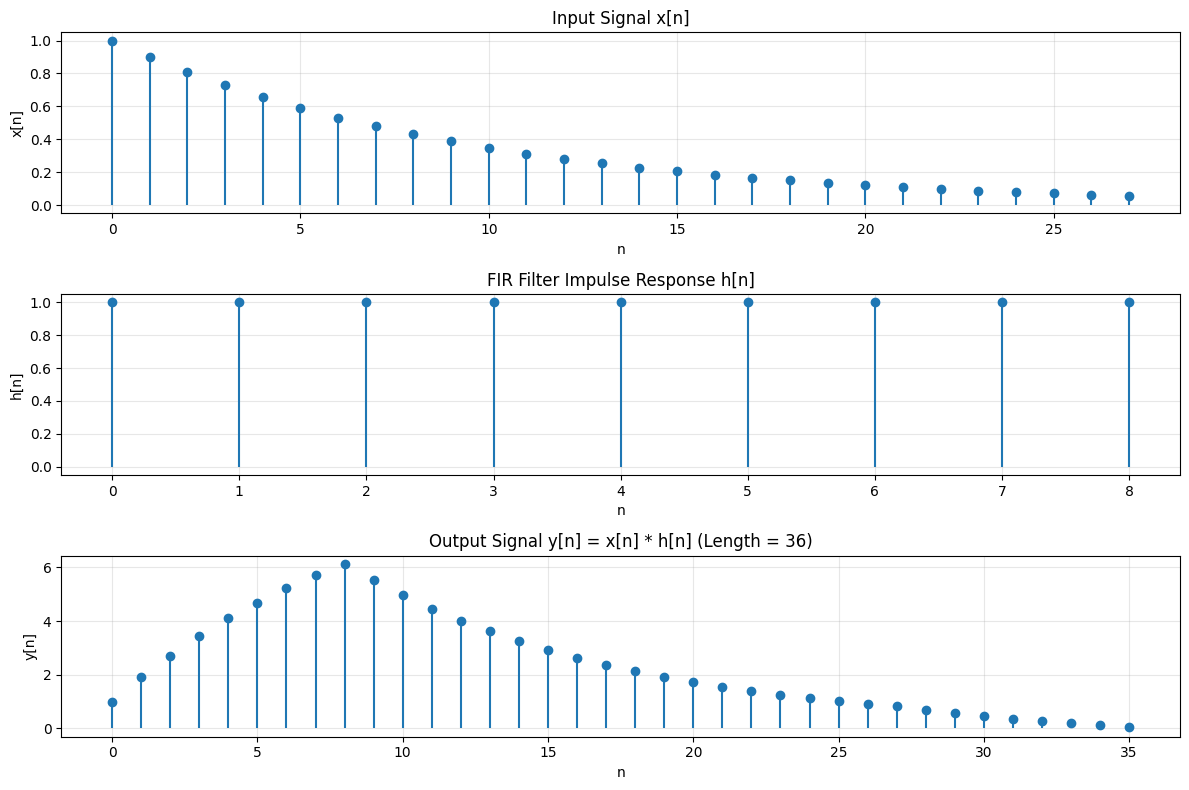

In [14]:
#Task 2A:

# Define x[n] from Problem 1
Nx = 28
n_x = np.arange(Nx)
x = 0.9**n_x

# Define h[n] - FIR filter
Nh = 9
h = np.ones(Nh)

# Compute convolution y[n] = x[n] * h[n]
y = np.convolve(x, h, mode='full')

# Length of output signal
Ny = len(y)

print(f"Length of x[n]: Nx = {Nx}")
print(f"Length of h[n]: Nh = {Nh}")
print(f"Length of y[n]: Ny = {Ny}")
print(f"\nTheoretical length: Ny = Nx + Nh - 1 = {Nx} + {Nh} - 1 = {Nx + Nh - 1}")
print(f"Does it agree with theory? {Ny == Nx + Nh - 1}")

print("\nExplanation:")
print("When convolving two finite sequences of lengths Nx and Nh,")
print("the output sequence has length Ny = Nx + Nh - 1.")
print("This is because the convolution sum extends over all values")
print("where the two sequences overlap as one slides past the other.")

# Plot the output signal
n_y = np.arange(Ny)

plt.figure(figsize=(12, 8))

# Plot x[n]
plt.subplot(3, 1, 1)
plt.stem(n_x, x, basefmt=' ')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Input Signal x[n]')
plt.grid(True, alpha=0.3)

# Plot h[n]
plt.subplot(3, 1, 2)
n_h = np.arange(Nh)
plt.stem(n_h, h, basefmt=' ')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('FIR Filter Impulse Response h[n]')
plt.grid(True, alpha=0.3)

# Plot y[n]
plt.subplot(3, 1, 3)
plt.stem(n_y, y, basefmt=' ')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title(f'Output Signal y[n] = x[n] * h[n] (Length = {Ny})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

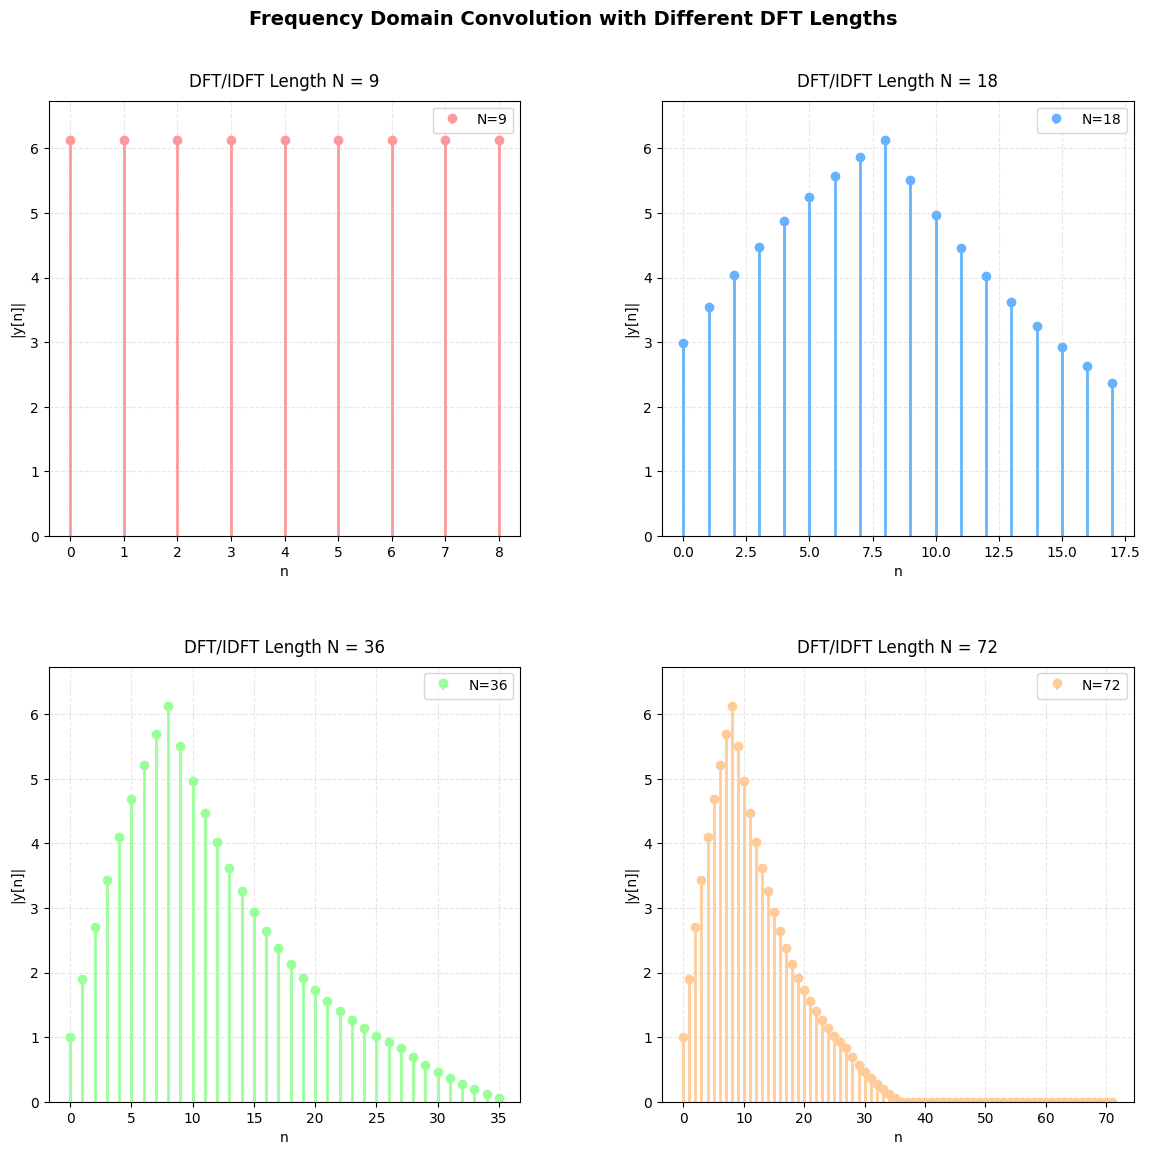


Observations:
• N=9:  Severe time-domain aliasing (insufficient length)
• N=18: Moderate aliasing, but still incorrect
• N=36: Matches the theoretical length requirement (Nx + Nh - 1 = 36)
• N=72: Over-padding, same result as N=36 but with more zero samples


In [34]:
#Task 2B:

def mult_in_F(N):
    X = np.fft.fft(x, N)
    H = np.fft.fft(h, N)
    Y = X * H
    y_freq = np.fft.ifft(Y)
    return y_freq

# Create figure with subplots and extra space for title
fig = plt.figure(figsize=(14, 13))
# Add main title with proper spacing
fig.suptitle('Frequency Domain Convolution with Different DFT Lengths', 
             fontsize=14, fontweight='bold', y=0.95)

# Create subplot grid with proper spacing
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
ax = gs.subplots()

# Nice pastel colors for the stems
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plot each subplot with different DFT lengths
for idx, N in enumerate([9, 18, 36, 72]):
    row, col = idx // 2, idx % 2
    
    # Calculate frequency domain result
    y_freq = mult_in_F(N)
    
    # Create stem plot
    markerline, stemlines, baseline = ax[row, col].stem(
        np.arange(N), 
        np.abs(y_freq), 
        basefmt=' ',
        label=f'N={N}'
    )
    
    # Customize stem plot appearance
    markerline.set_markerfacecolor(colors[idx])
    markerline.set_markeredgecolor(colors[idx])
    stemlines.set_color(colors[idx])
    stemlines.set_linewidth(2)
    
    # Add grid, labels, and title
    ax[row, col].grid(True, alpha=0.3, linestyle='--')
    ax[row, col].set_xlabel('n', fontsize=10)
    ax[row, col].set_ylabel('|y[n]|', fontsize=10)
    ax[row, col].set_title(f'DFT/IDFT Length N = {N}', fontsize=12, pad=10)
    ax[row, col].legend(loc='upper right')
    
    # Set y-axis limits for better comparison
    ax[row, col].set_ylim(0, max(np.abs(y_freq)) * 1.1)

# Adjust layout (with less aggressive tight_layout)
plt.show()

# Print observations
print("\nObservations:")
print("="*70)
print("• N=9:  Severe time-domain aliasing (insufficient length)")
print("• N=18: Moderate aliasing, but still incorrect")
print("• N=36: Matches the theoretical length requirement (Nx + Nh - 1 = 36)")
print("• N=72: Over-padding, same result as N=36 but with more zero samples")